In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
runs_df = pd.read_csv('runs.csv')

In [3]:
runs_df.tail()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
79442,6348,10,1238,6,0.0,1.25,5,AUS,Gelding,87,...,23.98,23.53,22.52,NaN,NaN,96.17,99.0,NaN,73,40
79443,6348,11,985,7,0.0,2.25,5,NZ,Gelding,84,...,24.10,23.77,22.61,NaN,NaN,96.30,99.0,NaN,164,63
79444,6348,12,3147,10,0.0,3.00,5,NZ,Gelding,83,...,24.06,23.37,22.43,NaN,NaN,96.44,99.0,NaN,111,68
79445,6348,13,1982,8,0.0,2.50,3,AUS,Gelding,82,...,24.02,23.45,22.29,NaN,NaN,96.34,4.6,NaN,118,95
79446,6348,14,3491,11,0.0,4.25,3,IRE,Gelding,81,...,24.06,23.77,23.10,NaN,NaN,96.63,99.0,NaN,27,4


In [4]:
cols = [
    'won',
    'horse_age',
    'horse_rating',
    'declared_weight',
    'actual_weight',
    'position_sec1',
    'position_sec2',
    'position_sec3',
    'behind_sec1',
    'behind_sec2',
    'behind_sec3',
    'time1',
    'time2',
    'time3',
    'finish_time'
]
df = runs_df[cols]
df.describe()

,won,horse_age,horse_rating,declared_weight,actual_weight,position_sec1,position_sec2,position_sec3,behind_sec1,behind_sec2,behind_sec3,time1,time2,time3,finish_time
count,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000
mean,0.080053,3.339346,61.034904,1104.953568,122.729656,6.849837,6.846791,6.843443,3.378768,4.083972,4.509457,21.135438,22.928985,23.864054,85.322914
std,0.271378,0.876763,11.748788,62.347597,6.305496,3.734348,3.733014,3.732055,4.282529,2.691107,16.541538,6.930518,3.599727,3.571163,18.512883
min,0.000000,2.000000,10.000000,693.000000,103.000000,1.000000,1.000000,1.000000,0.150000,0.150000,0.000000,12.390000,19.990000,21.000000,55.160000
25%,0.000000,3.000000,60.000000,1062.000000,118.000000,4.000000,4.000000,4.000000,1.500000,1.750000,1.750000,14.120000,22.290000,23.230000,70.590000
50%,0.000000,3.000000,60.000000,1102.000000,123.000000,7.000000,7.000000,7.000000,3.000000,3.750000,3.750000,24.180000,22.870000,23.760000,83.350000
75%,0.000000,3.000000,60.000000,1146.000000,128.000000,10.000000,10.000000,10.000000,5.000000,5.750000,5.750000,25.360000,23.520000,24.410000,100.780000
max,1.000000,10.000000,138.000000,1369.000000,133.000000,14.000000,14.000000,14.000000,999.000000,60.250000,999.000000,999.000000,999.000000,999.000000,163.580000


In [5]:
features = [
    'horse_age',
    'horse_rating',
    'declared_weight',
    'actual_weight',
    'position_sec1',
    'position_sec2',
    'position_sec3',
    'behind_sec1',
    'behind_sec2',
    'behind_sec3',
    'time1',
    'time2',
    'time3',
    'finish_time'
]
target = 'won'

X = df[features]
y = df[target].values.reshape(-1,1)
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Column Name: horse_age


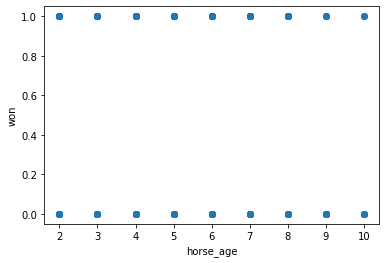

Column Name: horse_rating


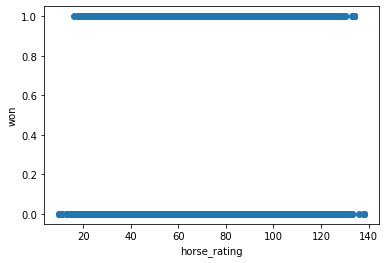

Column Name: declared_weight


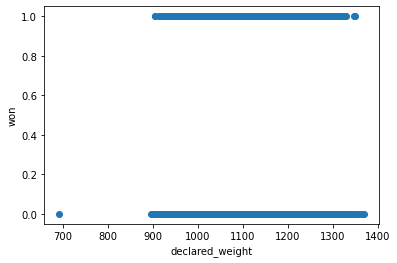

Column Name: actual_weight


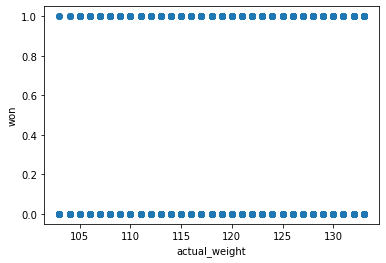

Column Name: position_sec1


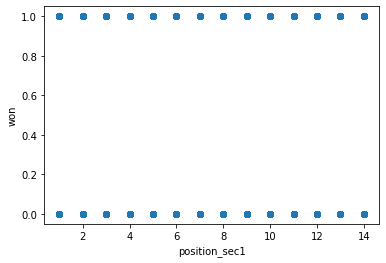

Column Name: position_sec2


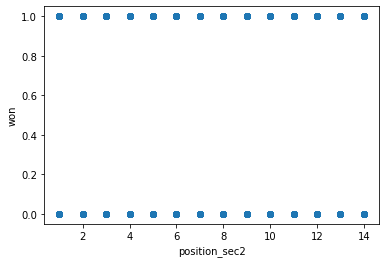

Column Name: position_sec3


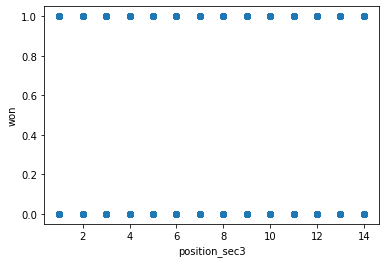

Column Name: behind_sec1


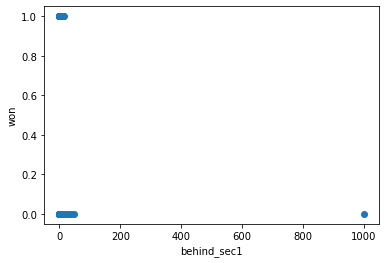

Column Name: behind_sec2


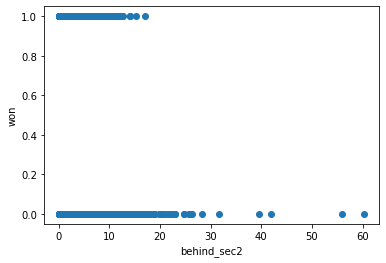

Column Name: behind_sec3


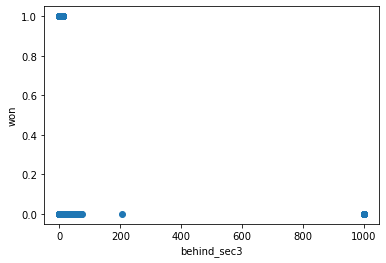

Column Name: time1


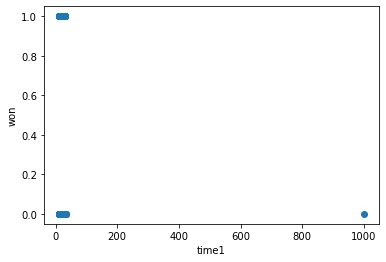

Column Name: time2


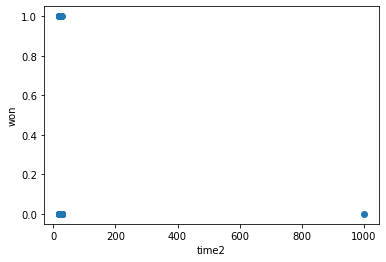

Column Name: time3


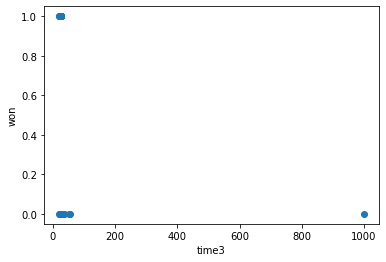

Column Name: finish_time


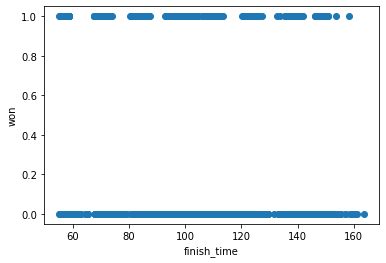

In [6]:
for i in features:
    print(f'Column Name: {i}')
    plt.plot(X[i],y,'o')
    plt.xlabel(f'{i}')
    plt.ylabel(f'{target}')
    plt.show()

In [7]:
df_copy = df.copy()

In [8]:
df_copy = df_copy.loc[(df_copy.behind_sec1 < 600)]
df_copy = df_copy.loc[(df_copy.behind_sec3 < 600)]
df_copy = df_copy.loc[(df_copy.time1 < 600)]
df_copy = df_copy.loc[(df_copy.time2 < 600)]
df_copy = df_copy.loc[(df_copy.time3 < 100)]
df_copy = df_copy.loc[(df_copy.declared_weight > 750)]

In [9]:
df_copy.describe()

,won,horse_age,horse_rating,declared_weight,actual_weight,position_sec1,position_sec2,position_sec3,behind_sec1,behind_sec2,behind_sec3,time1,time2,time3,finish_time
count,79424.000000,79424.000000,79424.000000,79424.000000,79424.000000,79424.000000,79424.000000,79424.000000,79424.000000,79424.000000,79424.000000,79424.000000,79424.000000,79424.000000,79424.000000
mean,0.080077,3.339431,61.035166,1104.957823,122.730019,6.849642,6.845991,6.841987,3.365836,4.082057,4.246332,21.122907,22.916646,23.850463,85.324892
std,0.271413,0.876840,11.750431,62.333067,6.305532,3.734015,3.732666,3.731368,2.419860,2.685272,3.482294,5.999967,0.982847,0.877128,18.512037
min,0.000000,2.000000,10.000000,896.000000,103.000000,1.000000,1.000000,1.000000,0.150000,0.150000,0.000000,12.390000,19.990000,21.000000,55.160000
25%,0.000000,3.000000,60.000000,1062.000000,118.000000,4.000000,4.000000,4.000000,1.500000,1.750000,1.750000,14.120000,22.290000,23.230000,70.590000
50%,0.000000,3.000000,60.000000,1102.000000,123.000000,7.000000,7.000000,7.000000,3.000000,3.750000,3.750000,24.180000,22.870000,23.760000,83.350000
75%,0.000000,3.000000,60.000000,1146.000000,128.000000,10.000000,10.000000,10.000000,5.000000,5.750000,5.750000,25.360000,23.520000,24.410000,100.780000
max,1.000000,10.000000,138.000000,1369.000000,133.000000,14.000000,14.000000,14.000000,47.250000,60.250000,206.750000,33.200000,27.410000,54.950000,163.580000


In [10]:
features = [
    'horse_age',
    'horse_rating',
    'declared_weight',
    'actual_weight',
    'position_sec1',
    'position_sec2',
    'position_sec3',
    'behind_sec1',
    'behind_sec2',
    'behind_sec3',
    'time1',
    'time2',
    'time3',
    'finish_time'
]
target = 'won'

X = df_copy[features]
y = df_copy[target].values.reshape(-1,1)
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Column Name: horse_age


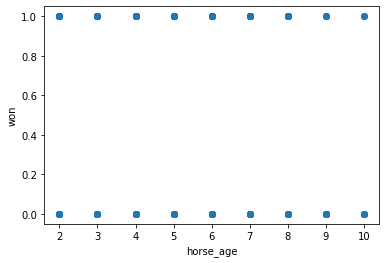

Column Name: horse_rating


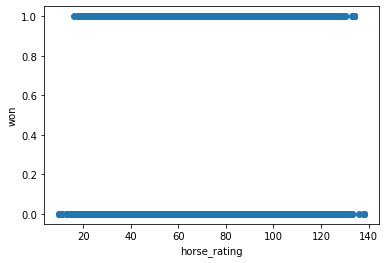

Column Name: declared_weight


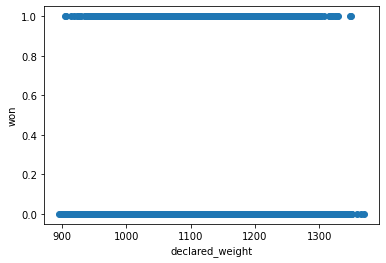

Column Name: actual_weight


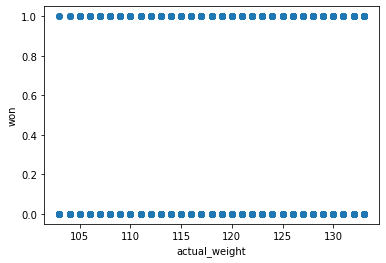

Column Name: position_sec1


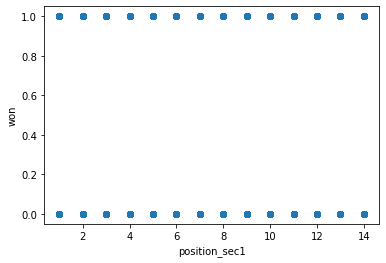

Column Name: position_sec2


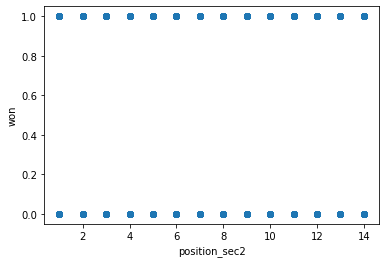

Column Name: position_sec3


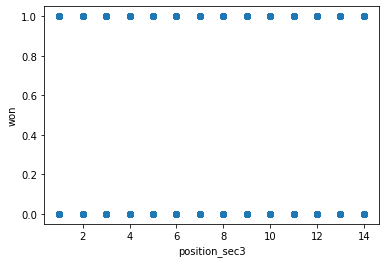

Column Name: behind_sec1


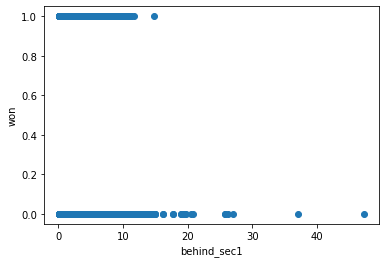

Column Name: behind_sec2


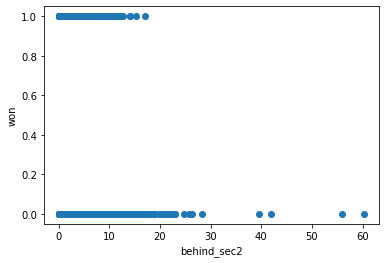

Column Name: behind_sec3


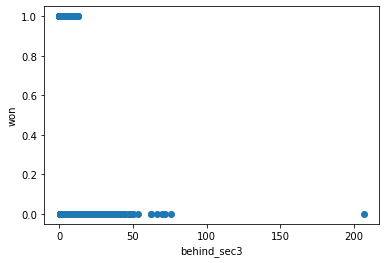

Column Name: time1


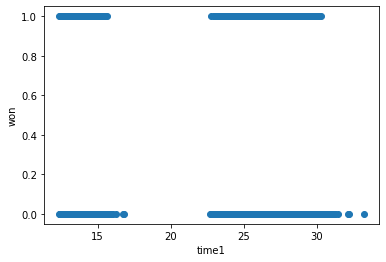

Column Name: time2


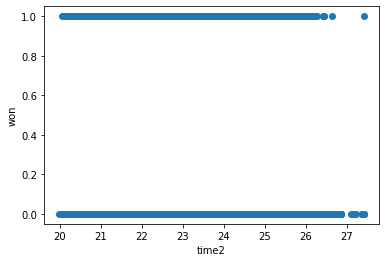

Column Name: time3


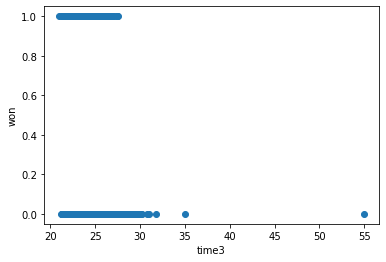

Column Name: finish_time


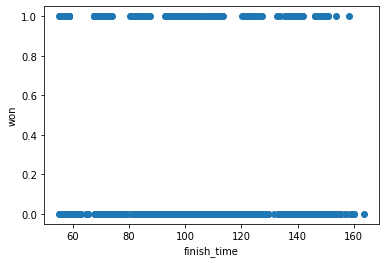

In [11]:
for i in features:
    print(f'Column Name: {i}')
    plt.plot(X[i],y,'o')
    plt.xlabel(f'{i}')
    plt.ylabel(f'{target}')
    plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [13]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC 
model = SVC(kernel='sigmoid')
model
model.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)


0.865407617248977

In [14]:
predictions = model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["win", "did not win"]))

              precision    recall  f1-score   support

         win       0.92      0.93      0.93     14624
 did not win       0.10      0.09      0.09      1261

    accuracy                           0.87     15885
   macro avg       0.51      0.51      0.51     15885
weighted avg       0.86      0.87      0.86     15885



In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [17]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.920, total=  11.3s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.920, total=  11.4s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.6s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.920, total=  11.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.920, total=  11.5s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.920, total=  11.4s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.920, total=  11.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.920, total=  11.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.920, total=  11.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.920, total=  11.5s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 15.3min finished


GridSearchCV(estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [18]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [19]:
predictions = grid.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["won", "lost"]))

              precision    recall  f1-score   support

         won       0.92      1.00      0.96     14624
        lost       0.00      0.00      0.00      1261

    accuracy                           0.92     15885
   macro avg       0.46      0.50      0.48     15885
weighted avg       0.85      0.92      0.88     15885



In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.20%
